# Base de données articles Zone Atelier

## Récupération des articles sur le site

https://www.cebc.cnrs.fr/publications-sous-presse/

In [2]:
import requests as req
import bs4 as bs
import pandas as pd

In [8]:
corpus = []
nb = []
for y in range(1980,2021):
    url = "https://www.cebc.cnrs.fr/publications-{}/".format(y)
    page = req.get(url)
    page = bs.BeautifulSoup(page.content)
    balises = page.find_all("p",{"align":"justify"}) + page.find_all("p",{"style":"text-align: justify;"})
    articles = [b.text for b in balises if b.text!='\xa0']
    corpus += [[y,i] for i in articles]
    print(y,len(articles))
    nb.append([y,len(articles)])
corpus = pd.DataFrame(corpus,columns=["year","data_raw"])
corpus.to_excel("publications.xlsx",index=False)

1980 15
1981 21
1982 14
1983 19
1984 15
1985 23
1986 33
1987 36
1988 22
1989 33
1990 38
1991 35
1992 36
1993 24
1994 37
1995 33
1996 54
1997 34
1998 42
1999 50
2000 58
2001 45
2002 61
2003 42
2004 49
2005 76
2006 63
2007 87
2008 86
2009 96
2010 90
2011 97
2012 99
2013 114
2014 136
2015 150
2016 106
2017 134
2018 133
2019 125
2020 160


## Nettoyage de la base de données

In [4]:
corpus = pd.read_excel("publications.xlsx")
corpus

,year,data_raw
0,1980,BOISSIN J. Cycle annuel du fonctionnement test...
1,1980,"BOISSIN-AGASSE L., MARTINET L. Contrôle photop..."
2,1980,"DEAT A., MAUGET C., MAUGET R., MAUREL D., SEMP..."
3,1980,"LAPLAUD P.M., BEAUBATIE L., MAUREL D. A sponta..."
4,1980,MAUGET R. Home range concept and activity patt...
...,...,...
2616,2020,"WEIMERSKIRCH H., COLLET J., CORBEAU A., PAJOT ..."
2617,2020,"WEIMERSKIRCH H., DE GRISSAC S., RAVACHE A., PR..."
2618,2020,"WINTERMANTEL D., ODOUX J.-F., DECOURTYE A., HE..."
2619,2020,"WYNN J., COLLET J., PRUDOR A., CORBEAU A., PAD..."


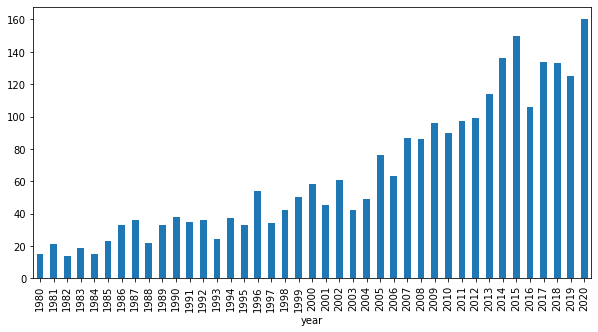

In [15]:
corpus.groupby("year")["data_raw"].count().plot(kind="bar",figsize=(10,5))

### Filtrer par la présence de noms

In [14]:
noms = ["bretagnolle","gaba ","berthet","houte","monceau","moreau"]
ss_corpus = corpus[corpus["data_raw"].str.lower().str.contains("|".join(noms))]
len(ss_corpus)

337

<AxesSubplot:xlabel='year'>

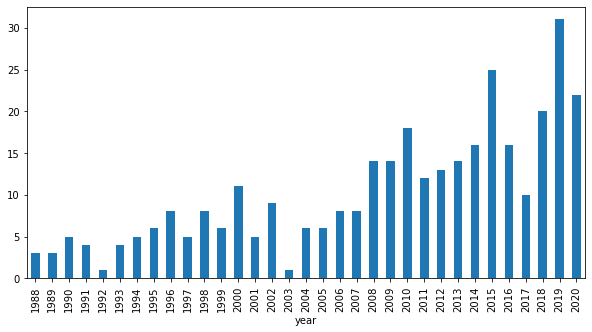

In [10]:
f = corpus["data_raw"].str.lower().str.contains("|".join(noms))
corpus[f].groupby("year")["data_raw"].count().plot(kind="bar",figsize=(10,5))

In [16]:
ss_corpus["à supprimer"] = None

/home/emilien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
ss_corpus.to_excel("db_2_à_nettoyer.xlsx")